
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    Eloi Corral López
</h3></center>


# Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python

Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [1]:
from platform import python_version

print(python_version())


3.9.7


Un paquete interesante puede ser statistics. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.


In [2]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)


3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

<IPython.core.display.Javascript object>


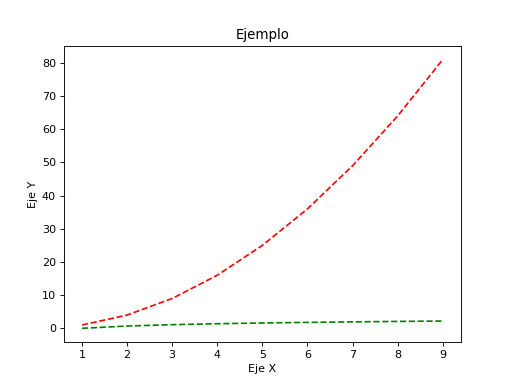

In [3]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).
Típicamente, el problema parte de una representación mediante un grafo ponderado $G=(N, A)$, donde $N$ es el conjunto de $n=|N|$ nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco $(i, j) ∈ A$ tiene asignado un peso $d_ij$ que representa la distancia entre las ciudades $i$ y $j$.
El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo $G$. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 
De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [2]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [5]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [3]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g3=Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
68.81748609463234



## P2.1: Implementación básica de Búsqueda Tabú (especificación obligatoria, 6pts)



En este apartado debes desarrollar una **versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP)** aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente.
Igual que en la práctica anterior (P1), consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia. Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las **siguientes consideraciones** de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  (permutaciones)  **comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos. 

❗  **NOTA: Es importante que la generación de la solución inicial se implemente en una función propia y que después, esta solución inicial se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  $S_{cand}$  a  partir  de  la  actual  $S_{act}$): Se utilizará el **operador  de  intercambio** y se generarán *todos los posibles intercambios**. Es decir, con este operador, se explota el vecindario de forma completa, con lo que se genera el siguiente número de vecinos:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

donde *L* es la longitud de la solución y se ha tenido en cuenta que es lo mismo intercambiar los vecinos *i, j* que *j, i*.

❗  **NOTA: Es importante que la generación del vecindario de una solución se implemente en una función propia y que después, el vecino seleccionado, se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**



- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    


- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **1000 iteraciones consecutivas** sin que mejore la solución óptima $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde ella: $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente ya que determinados intercambios prohibidos al estar incluidos en la lista tabú. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y **se vacía la lista tabú.**


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.



### Preguntas sobre la especificación obligatoria (se responde al final del notebook)

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (especificacion opcional, 4pts)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localizaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

**NOTA:** Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

### Preguntas sobre la práctica optativa (se responde al final del notebook)

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


---

# Respuestas a las preguntas

**Recordatorio:** No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P2.1 Especificación obligatoria

Esta primera parte se evalúa con 6 puntos. Para ello, es necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respetivamente. El conjunto de la implementación y las dos preguntas es lo que se evaluará en esta primera parte.

### **Pregunta 1** 

Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

<div class="alert alert-block alert-danger">
    <b>NOTA:</b> ¿Cómo me aseguro de que mi implementación es correcta?
    
Es importante que para poder comprobar la correcta implementación de tu solución, tu código tenga en cuenta los siguientes elementos:
-  Mantener en cada iteración la mejor solución encontrada hasta el momento y la iteración en la que se encontró
-  Que puedas imprimir los elementos que se encuentran en la lista tabú
-  Saber en qué iteraciones se llevaron a cabo los reinicios
</div>

<div class="alert alert-block alert-success">
<b>NOTA:</b>  Para verificar tu implementación, debes utilizar el fichero de localizaciones de los 100 concellos gallegos (grafo100cidades.txt). Puedes utilizar como prueba para verificar que la implementaición es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km para el problema de prueba con 8 ciudades.
</div>
    
<div class="alert alert-block alert-success">    
<b>AYUDA EXTRA</b>: Si quieres comprobar la implementación de tu práctica puedes probar a utilizar como solución inicial la solución siguiente (pasándosela directamente a la función que implementa el algoritmo de búsqueda tabú):
    
<b> Solución inicial: </b> 
- [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
- <b> Coste de la solución: </b> 1663.18
- <b>Iteración en la que se encuentra la mejor solución:</b> 4632
</div>




## Respuesta 1

El código desarrollado se divide en 5 funciones y 3 variables definidas de forma global.


#### Funciones:

    -coste_solucion: función que dada una tupla solución (conformada por las ciudades a visitar sin incluir la de partida y llegada, es decir, la cero) devuelve el coste del camino que representa dicha solución.

    -coste_v2: función destinada a calcular el coste de una forma más óptima al generar vecinos. Recibe la solución y el coste actual y el movimiento que genera el nuevo vecino. En función de estos resta los arcos entre ciudades que cambian y suma los nuevos para hallar el nuevo coste.

    -genera_solucion_inicial: genera una tupla solución que representa el conjunto de ciudades que se visitan desde que se sale de la 0 hasta volver a esta.

    -genera_vecindario: función que a partir de la solución actual explora todos sus vecinos seleccionando el de menor coste de los que no pertenecen a la lista tabú. Para ello se comprueba que el movimiento (i,j) que lo genera no esté guardado en la lista de movimientos tabú.

    -busqueda_tabu: función que dado un objeto localizaciones utiliza la búsqueda tabú para tratar de hallar un buen camino que conecte las ciudades que contiene. Para ello comienza llamando a la función que genera la solución inicial y a partir de esta entra en un bucle del máximo de iteraciones indicado en el que va explorando las soluciones generando sus vecinos y estableciendo reinicializaciones en caso de que la búsqueda no esté siendo fructífera. Para ver mejor la estructura de la función observar los comentarios del código.

#### Variables:

    -N: tamaño de la lista que contiene los movimientos tabú.
    -MAXITER: número máximo de iteraciones permitidas sin mejorar la solución óptima.
    -ITER: número de iteraciones de la búsqueda tabú.

## Código

In [5]:
# escribe aqui el codigo de la implementacion basica del algoritmo de busqueda tabu
# se dan pre-definidas las funciones mínimas que debe tener la implementación, dales los parámetros que creas oportunos
# puedes definir funciones adicionales, estos solo son los requisitos mínimos
# recuerda que puedes incluir tantas celdas como quieras
import random
from tqdm.notebook import tqdm



#definir

#tenencia tabú-tamaño de la cola de movimientos tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000


#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste
    #enlace ciudad 0--primera ciudad

#Versión 2 de la función de coste, en lugar de recorrer cada elemento de la solución
#se valoran solo los arcos entre ciudades que cambian
def coste_v2(Sact,i,j,Cact,g):

    costearestar=0
    costeasumar=0
    
    #Arco Esquerda de i
    #si i es la primera de la solución se calcula la distancia con la de partida
    if(i==0):
        #RESTAR
        costearestar+=g.distancia(0,Sact[i])
        #SUMAR
        costeasumar+=g.distancia(0,Sact[j])
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[i-1],Sact[i])
        #SUMAR
        costeasumar+=g.distancia(Sact[i-1],Sact[j])
    
    #Arco Dereita de j
    #si j es la última de la solución se calcula con la de partida
    if(j==g.nciudades-2):
        #RESTAR
        costearestar+=g.distancia(Sact[j],0)
        #SUMAR
        costeasumar+=g.distancia(Sact[i],0)
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[j],Sact[j+1])
        #SUMAR
        costeasumar+=g.distancia(Sact[i],Sact[j+1])
    
    #Si no son contiguos:
    if(abs(i-j)!=1):
        #RESTAR
        #dereita de i
        costearestar+=g.distancia(Sact[i],Sact[i+1])
        #esquerda de j
        costearestar+=g.distancia(Sact[j-1],Sact[j])
        #SUMAR
        #dereita de i
        costeasumar+=g.distancia(Sact[j],Sact[i+1])
        #esquerda de j
        costeasumar+=g.distancia(Sact[j-1],Sact[i])
    
        
    #Cálculo final
    Ccand=Cact+costeasumar-costearestar
    return Ccand


   

# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    #Generar vector, no se tiene en cuenta la ciudad de partida y de llegada (la 0) en el vector solución
    sol = [x for x in range (1,g.nciudades)]
    #Barajar
    random.shuffle(sol)
    
    return sol

    
    
# funcion de generacion de vencindario
def genera_vecindario(Sact,tabu, g):
    
    #Establecemos el mejor coste hasta ahora a infinito
    cmejvec=float('inf')
    
    #Calculamos el coste de la actual
    Cact=coste_solucion(Sact,g)
    
    #Recorremos los posibles movimientos
    for i in range (len(Sact)):
        for j in range (i+1,len(Sact)):
            #Si no está en la tabú
            if (i,j) not in tabu:
                #Generamos solución y calculamos coste
                Scand=Sact.copy()
                Scand[i]=Sact[j]
                Scand[j]=Sact[i]
                cactual=coste_v2(Sact,i,j,Cact,g)
                #Si el coste es menor que el mejor hasta el momento se guarda como mejor vecino y se almacena el movimiento
                if(cactual<cmejvec):
                    mejvec=Scand
                    cmejvec=cactual
                    betarmovimiento=(i,j)
    
    #ver si lista está llena
    if(len(tabu)==N):
        tabu.pop(0) #eliminamos primer elemento(más antiguo)
    
    #añadimos el movimiento que generó el mejor vecino
    tabu.append(betarmovimiento)
    
                
    return mejvec,cmejvec
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(g):
    #Generar solución inicial
    #Sact=genera_solucion_inicial(g)
    Sact=[14, 7, 9, 11, 47, 49, 86, 54, 31, 12, 10, 58, 99, 60, 39, 72, 43, 66, 93, 34, 35, 15, 59, 32, 84, 87, 76, 79, 36, 81, 82, 71, 64, 51, 94, 6, 69, 68, 61, 8, 65, 73, 2, 56, 20, 42, 21, 29, 1, 33, 83, 48, 40, 38, 97, 52, 17, 25, 74, 80, 90, 53, 91, 19, 23, 4, 77, 98, 96, 37, 3, 18, 57, 46, 50, 88, 85, 26, 41, 16, 55, 95, 30, 67, 13, 5, 45, 22, 92, 63, 75, 62, 44, 78, 70, 24, 28, 89, 27]
    
    #Se añade como óptima hasta ahora
    Sopt=Sact
    Cact=coste_solucion(Sact,g)
    Copt=Cact
    
    #iteración óptimo, la cero sería la primera del bucle por lo que se pone la -1
    iteracion_opt=-1
    iteraciones_sinmejora=0
    iteraciones_reinicios=[]
    
    #Lista tabú
    tabu=[]
    
    #Realizamos las iteraciones, se utiliza tqdm para la barra de progreso
    for i in tqdm(range(ITER)):
        
        #Genera mejor vecino
        Sact,Cact=genera_vecindario(Sact,tabu,g)

        #Si el coste del mejor vecino es menor que el óptimo hasta ahora el mejor vecino pasa a ser la solución óptima
        if(Cact<Copt):
            Sopt=Sact
            Copt=Cact
            iteracion_opt=i
            iteraciones_sinmejora=0
        #Si no incrementamos iteraciones sin mejora
        else:
            iteraciones_sinmejora+=1

        #si se llega al máximo de iteracions sin mejora se reinicializa partiendo de la solución óptima hasta el momentoy vaciando la lista tabú
        if(iteraciones_sinmejora==MAXITER):
            #reinicializar desde a óptima (intensificación)
            Sact=Sopt
            Cact=Copt
            tabu=[]
            iteraciones_reinicios.append(i)
            iteraciones_sinmejora=0
            
        if (i==150):
            print("Tabú",tabu)
    
    return Sopt,Copt,iteracion_opt,iteraciones_reinicios
        



In [6]:
g1=Localizaciones(filename='./data/grafo100cidades.txt')

print("SOLUCION",busqueda_tabu(g1))

  0%|          | 0/10000 [00:00<?, ?it/s]

Tabú [(25, 79), (46, 98), (76, 86), (21, 68), (20, 52), (55, 67), (56, 66), (21, 53), (33, 65), (22, 34), (4, 6), (35, 58), (10, 17), (22, 37), (45, 95), (2, 86), (40, 49), (61, 65), (8, 83), (11, 17), (11, 18), (12, 19), (12, 18), (63, 64), (69, 73), (70, 72), (91, 92), (89, 90), (13, 15), (3, 5), (42, 84), (43, 89), (42, 83), (41, 82), (41, 42), (50, 51), (27, 28), (7, 75), (34, 74), (6, 75), (33, 74), (4, 5), (6, 34), (65, 68), (63, 68), (64, 67), (63, 66), (60, 62), (60, 61), (5, 34), (4, 75), (33, 75), (33, 34), (23, 24), (38, 40), (8, 41), (9, 42), (10, 41), (53, 55), (54, 55), (71, 72), (32, 74), (32, 75), (36, 37), (1, 77), (76, 87), (86, 87), (77, 88), (1, 87), (1, 88), (74, 75), (81, 89), (86, 88), (96, 97), (96, 98), (45, 96), (82, 83), (81, 83), (83, 84), (49, 89), (43, 90), (8, 89), (9, 89), (97, 98), (42, 90), (41, 89), (9, 40), (8, 39), (3, 4), (2, 3), (2, 4), (10, 11), (11, 89), (10, 89), (20, 21), (70, 73), (71, 73), (72, 73), (31, 74), (31, 76)]
SOLUCION ([88, 53, 44,

In [8]:
string="[(25, 79), (46, 98), (76, 86), (21, 68), (20, 52), (55, 67), (56, 66), (21, 53), (33, 65), (22, 34), (4, 6), (35, 58), (10, 17), (22, 37), (45, 95), (2, 86), (40, 49), (61, 65), (8, 83), (11, 17), (11, 18), (12, 19), (12, 18), (63, 64), (69, 73), (70, 72), (91, 92), (89, 90), (13, 15), (3, 5), (42, 84), (43, 89), (42, 83), (41, 82), (41, 42), (50, 51), (27, 28), (7, 75), (34, 74), (6, 75), (33, 74), (4, 5), (6, 34), (65, 68), (63, 68), (64, 67), (63, 66), (60, 62), (60, 61), (5, 34), (4, 75), (33, 75), (33, 34), (23, 24), (38, 40), (8, 41), (9, 42), (10, 41), (53, 55), (54, 55), (71, 72), (32, 74), (32, 75), (36, 37), (1, 77), (76, 87), (86, 87), (77, 88), (1, 87), (1, 88), (74, 75), (81, 89), (86, 88), (96, 97), (96, 98), (45, 96), (82, 83), (81, 83), (83, 84), (49, 89), (43, 90), (8, 89), (9, 89), (97, 98), (42, 90), (41, 89), (9, 40), (8, 39), (3, 4), (2, 3), (2, 4), (10, 11), (11, 89), (10, 89), (20, 21), (70, 73), (71, 73), (72, 73), (31, 74), (31, 76)]"
string1=string.replace("(","[")
string2=string1.replace(")","]")
print(string2)

[[25, 79], [46, 98], [76, 86], [21, 68], [20, 52], [55, 67], [56, 66], [21, 53], [33, 65], [22, 34], [4, 6], [35, 58], [10, 17], [22, 37], [45, 95], [2, 86], [40, 49], [61, 65], [8, 83], [11, 17], [11, 18], [12, 19], [12, 18], [63, 64], [69, 73], [70, 72], [91, 92], [89, 90], [13, 15], [3, 5], [42, 84], [43, 89], [42, 83], [41, 82], [41, 42], [50, 51], [27, 28], [7, 75], [34, 74], [6, 75], [33, 74], [4, 5], [6, 34], [65, 68], [63, 68], [64, 67], [63, 66], [60, 62], [60, 61], [5, 34], [4, 75], [33, 75], [33, 34], [23, 24], [38, 40], [8, 41], [9, 42], [10, 41], [53, 55], [54, 55], [71, 72], [32, 74], [32, 75], [36, 37], [1, 77], [76, 87], [86, 87], [77, 88], [1, 87], [1, 88], [74, 75], [81, 89], [86, 88], [96, 97], [96, 98], [45, 96], [82, 83], [81, 83], [83, 84], [49, 89], [43, 90], [8, 89], [9, 89], [97, 98], [42, 90], [41, 89], [9, 40], [8, 39], [3, 4], [2, 3], [2, 4], [10, 11], [11, 89], [10, 89], [20, 21], [70, 73], [71, 73], [72, 73], [31, 74], [31, 76]]


###  **Pregunta 2**

La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


## Respuesta 2
Para el desarrollo de este apartado se implementó una función pruebas que a partir del objeto localizaciones recibido y del número de pruebas pasado como parámetro ejecutará la búsqueda tabú dicho número de veces, almacenando los resultados de cada ejecución y presentándolos por pantalla.

En primer lugar se presenta el coste, iteración y tiempo de la mejor solución. A continuación se presenta la media, desviación típica y los propios datos de cada atributo (coste, tiempo e iteración)

En este caso el número de iteración de la mejor solución fue el 2900. El resto de datos se pueden observar en los resultados de la ejecución de la siguiente celda.

In [7]:
import statistics
import time

#tenencia tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000

def pruebas(g,numpruebas):
    #lista de resultados
    resultados=[]
    coste=[]
    iteraciones=[]
    reinicios=[]
    tiempos=[]
    #bucle para las pruebas con barra de progreso
    for i in tqdm(range(numpruebas)):
        
        inicio=time.time()
        
        a,b,c,d=busqueda_tabu(g)
        
        final=time.time()
        
        resultados.append(a)
        coste.append(b)
        iteraciones.append(c)
        reinicios.append(d)
        tiempos.append(final-inicio)
        
    indicemejor=coste.index(min(coste))
    
    print("MEJOR ITERACIÓN:")
    print()
    print("Coste: ",coste[indicemejor])
    print("Número iteración: ",iteraciones[indicemejor])
    print("Tiempo: ",tiempos[indicemejor])
    print()
    print("GENERALES:")
    print()
    print("(Coste)")
    print("Media: ",statistics.mean(coste))
    print("Desviación típica: ",statistics.stdev(coste))
    print("--------------------------------")
    print("Coste: ",coste)
    print()
    print("(Tiempo)")
    print("Media: ",statistics.mean(tiempos))
    print("Desviación típica: ",statistics.stdev(tiempos))
    print("--------------------------------")
    print("Tiempos:",tiempos)
    print()
    print("(Iteracion)")
    print("Media: ",statistics.mean(iteraciones))
    print("Desviación típica: ",statistics.stdev(iteraciones))
    print("--------------------------------")
    print("Iteraciones:",iteraciones)
    
    
    
    

#g100=Localizaciones(filename='./data/grafo100cidades.txt')
#pruebas(g100,10)
        

❗  **NOTA: sé conservador en tu estrategia para verificar tu implementación**, especialmente cuando empleas ficheros de datos grandes como el del problema de las 100 ciudades. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

## P2.2 Especificación opcional

### **Pregunta 3** 

¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos. (MAX. aprox. 600 palabras)

Esta segunda parte es optativa y se evaluará sobre 4 puntos. Para ello es necesario que realicéis la implementación de las mejoras, mostréis el código en el que han sido implementadas y comentéis el porqué de estas mejoras y los resultados obtenidos.

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir*

## Respuesta 3
Para la realización de esta parte de la práctica se optó por implementar 3 mejoras distintas:

#### Solución inicial greedy: 
    
    En la implementación básica se generaba una solución de partida para el algoritmo de forma totalmente aleatoria, en este caso se utiliza una estrategia voraz que, partiendo de la ciudad cero, irá seleccionando siempre la ciudad más cercana no visitada. Esta mejora permite partir de una solución con cierta calidad (aunque no óptima) lo cúal puede mejorar la búsqueda tabú. Para su implementación basta con modificar la función genera_solución_inicial para que siga la estrategia voraz.
    
#### Criterio de aspiración:
    
    Esta mejora se basará en modificar la gestión de la lista tabú. Mientras que en la implementación básica se rechazaba cualquier vecino presente en la lista tabú, en esta alternativa se valorará si su coste es menor que el óptimo hasta el momento (en cuyo caso se admite aunque esté en la lista tabú). Esta mejora permite una mayor flexibilidad en la gestión del tabú de forma que no se pasan por alto soluciones mejores que la óptima si son tabú, estas si se ignoran en la versión base. 
    
    Para la implementación, se modifica la función de genera_vecindario, adelantando el cálculo del coste a antes de la comprobación de si el movimiento (i,j) es tabú, y añadiendo al if con el operador or la condición de que se acepte si el coste es menor que el coste óptimo (este se añade como parámetro a la función)
    
#### Reinicialización para dar diversificación con una estrategia de memoria a largo plazo
    
    Esta mejora se basa en modificar el sistema de reinicialización, de forma que se incremente la diversificación basándose en el desarrollo del algoritmo hasta el momento. Para ello se creará una matriz de frecuencias simétrica que almacena cuantas veces se ha dado un arco hasta el momento, dicha matriz es actualizada en cada iteración.
    
    Además se crea una función reinicializar, que recibe la matriz de frecuencia y la distancia máxima y mínima entre ciudades, que se calcula antes del bucle de la función principal. La función de reinicializar generará una nueva matriz de distancias basada en la matriz de frecuencias y, utlizando dicha matriz de distancias y una estrategia voraz, genera la nueva solución de partida y la devuelve. 
    
    Esta mejora permite añadir a la implementación memoria a largo plazo, la cual se utiliza para penalizar aquellos arcos que menos se repiten. De esta forma a la hora de reinicializar se estaría utilizando información recopilada a lo largo de toda la ejecución, y no únicamente la solución óptima en ese momento.
    

    
### Resultados

    En lo referente a los resultados obtenidos para las mejoras, estos se pueden observar en las ejecuciones de las siguientes celdas, en las que se realizaron pruebas con 5 ejecuciones. La primera celda corresponde a la ejecución de USA120 sin mejoras, las siguientes son inicialización greedy, matriz de frecuencias y criterio de aspiración. 

    En este caso las mejoras que han apartado un buen rendimiento han sido la generación voraz de la solución original y la reinicialización con memoria a largo plazo. Ambas presentan un rendimiento similar, con mínimos de 25619 y 25415 respectivamente, mientras que las medias de coste son de 25619 y 25671, siendo los tiempos de ejecución prácticamente idénticos también. La mejora resulta considerable, ya que la versión básica obtuvo un coste mínimo de 30199 y una media de 30918, por lo que hay más de 5 mil unidades de diferencia. 

    En lo referente a la mejora del criterio de aspiración, esta no ha resultado efectiva, ya que sus resultados son peores que los de la versión básica, con un mínimo de 31895 y un máximo de 32940. Esto puede deberse al criterio de aspiración concreto, podría sustituirse en futuras pruebas este y únicamente aceptar soluciones tabús cuando estas sean bastante mejores que la óptima hasta el momento y que no baste con tener un coste ligeramente menor.
    
    En conclusión, el añadir una estrategia voraz para inicializar el algoritmo y la diversificación en la reinicialización resultan dos factores clave a la hora de mejorar la exploración del espacio de soluciones y obtener mejores resultados.

In [12]:
#VERSIÓN BÁSICA

#tenencia tabú-tamaño de la cola de movimientos tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000


#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste
    #enlace ciudad 0--primera ciudad

#Versión 2 de la función de coste, en lugar de recorrer cada elemento de la solución
#se valoran solo los arcos entre ciudades que cambian
def coste_v2(Sact,i,j,Cact,g):

    costearestar=0
    costeasumar=0
    
    #Arco Esquerda de i
    #si i es la primera de la solución se calcula la distancia con la de partida
    if(i==0):
        #RESTAR
        costearestar+=g.distancia(0,Sact[i])
        #SUMAR
        costeasumar+=g.distancia(0,Sact[j])
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[i-1],Sact[i])
        #SUMAR
        costeasumar+=g.distancia(Sact[i-1],Sact[j])
    
    #Arco Dereita de j
    #si j es la última de la solución se calcula con la de partida
    if(j==g.nciudades-2):
        #RESTAR
        costearestar+=g.distancia(Sact[j],0)
        #SUMAR
        costeasumar+=g.distancia(Sact[i],0)
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[j],Sact[j+1])
        #SUMAR
        costeasumar+=g.distancia(Sact[i],Sact[j+1])
    
    #Si no son contiguos:
    if(abs(i-j)!=1):
        #RESTAR
        #dereita de i
        costearestar+=g.distancia(Sact[i],Sact[i+1])
        #esquerda de j
        costearestar+=g.distancia(Sact[j-1],Sact[j])
        #SUMAR
        #dereita de i
        costeasumar+=g.distancia(Sact[j],Sact[i+1])
        #esquerda de j
        costeasumar+=g.distancia(Sact[j-1],Sact[i])
    
        
    #Cálculo final
    Ccand=Cact+costeasumar-costearestar
    return Ccand


   

# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    #Generar vector, no se tiene en cuenta la ciudad de partida y de llegada (la 0) en el vector solución
    sol = [x for x in range (1,g.nciudades)]
    #Barajar
    random.shuffle(sol)
    
    return sol

    
    
# funcion de generacion de vencindario
def genera_vecindario(Sact,tabu, g):
    
    #Establecemos el mejor coste hasta ahora a infinito
    cmejvec=float('inf')
    
    #Calculamos el coste de la actual
    Cact=coste_solucion(Sact,g)
    
    #Recorremos los posibles movimientos
    for i in range (len(Sact)):
        for j in range (i+1,len(Sact)):
            #Si no está en la tabú
            if (i,j) not in tabu:
                #Generamos solución y calculamos coste
                Scand=Sact.copy()
                Scand[i]=Sact[j]
                Scand[j]=Sact[i]
                cactual=coste_v2(Sact,i,j,Cact,g)
                #Si el coste es menor que el mejor hasta el momento se guarda como mejor vecino y se almacena el movimiento
                if(cactual<cmejvec):
                    mejvec=Scand
                    cmejvec=cactual
                    betarmovimiento=(i,j)
    
    #ver si lista está llena
    if(len(tabu)==N):
        tabu.pop(0) #eliminamos primer elemento(más antiguo)
    
    #añadimos el movimiento que generó el mejor vecino
    tabu.append(betarmovimiento)
    
                
    return mejvec,cmejvec
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(g):
    #Generar solución inicial
    Sact=genera_solucion_inicial(g)
    #Sact=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #Se añade como óptima hasta ahora
    Sopt=Sact
    Cact=coste_solucion(Sact,g)
    Copt=Cact
    
    #iteración óptimo, la cero sería la primera del bucle por lo que se pone la -1
    iteracion_opt=-1
    iteraciones_sinmejora=0
    iteraciones_reinicios=[]
    
    #Lista tabú
    tabu=[]
    
    #Realizamos las iteraciones, se utiliza tqdm para la barra de progreso
    for i in tqdm(range(ITER)):
        
        #Genera mejor vecino
        Sact,Cact=genera_vecindario(Sact,tabu,g)

        #Si el coste del mejor vecino es menor que el óptimo hasta ahora el mejor vecino pasa a ser la solución óptima
        if(Cact<Copt):
            Sopt=Sact
            Copt=Cact
            iteracion_opt=i
            iteraciones_sinmejora=0
        #Si no incrementamos iteraciones sin mejora
        else:
            iteraciones_sinmejora+=1

        #si se llega al máximo de iteracions sin mejora se reinicializa partiendo de la solución óptima hasta el momentoy vaciando la lista tabú
        if(iteraciones_sinmejora==MAXITER):
            #reinicializar desde a óptima (intensificación)
            Sact=Sopt
            Cact=Copt
            tabu=[]
            iteraciones_reinicios.append(i)
            iteraciones_sinmejora=0
    
    return Sopt,Copt,iteracion_opt,iteraciones_reinicios

g2=Localizaciones(filename='./data/US120.txt')

pruebas(g2,5)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR ITERACIÓN:

Coste:  30199.777645320424
Número iteración:  4706
Tiempo:  1667165561.3019507

GENERALES:

(Coste)
Media:  30918.651062987385
Desviación típica:  720.5220629778795
--------------------------------
Coste:  [30199.777645320424, 30204.48498970681, 31715.714155556227, 31562.41022383204, 30910.86830052142]

(Tiempo)
Media:  1667166350.607055
Desviación típica:  623.4168643798865
--------------------------------
Tiempos: [1667165561.3019507, 1667165957.011113, 1667166351.804175, 1667166743.392721, 1667167139.5253153]

(Iteracion)
Media:  6072.6
Desviación típica:  2238.772163486048
--------------------------------
Iteraciones: [4706, 4536, 6432, 9840, 4849]


In [8]:
#INICIALIZACIÓN GREEDY

from helpers_mod_sa import *
import random
from tqdm.notebook import tqdm



#definir

#tenencia tabú-tamaño de la cola de movimientos tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000


#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste
    #enlace ciudad 0--primera ciudad

#Versión 2 de la función de coste, en lugar de recorrer cada elemento de la solución
#se valoran solo los arcos entre ciudades que cambian
def coste_v2(Sact,i,j,Cact,g):

    costearestar=0
    costeasumar=0
    
    #Arco Esquerda de i
    #si i es la primera de la solución se calcula la distancia con la de partida
    if(i==0):
        #RESTAR
        costearestar+=g.distancia(0,Sact[i])
        #SUMAR
        costeasumar+=g.distancia(0,Sact[j])
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[i-1],Sact[i])
        #SUMAR
        costeasumar+=g.distancia(Sact[i-1],Sact[j])
    
    #Arco Dereita de j
    #si j es la última de la solución se calcula con la de partida
    if(j==g.nciudades-2):
        #RESTAR
        costearestar+=g.distancia(Sact[j],0)
        #SUMAR
        costeasumar+=g.distancia(Sact[i],0)
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[j],Sact[j+1])
        #SUMAR
        costeasumar+=g.distancia(Sact[i],Sact[j+1])
    
    #Si no son contiguos:
    if(abs(i-j)!=1):
        #RESTAR
        #dereita de i
        costearestar+=g.distancia(Sact[i],Sact[i+1])
        #esquerda de j
        costearestar+=g.distancia(Sact[j-1],Sact[j])
        #SUMAR
        #dereita de i
        costeasumar+=g.distancia(Sact[j],Sact[i+1])
        #esquerda de j
        costeasumar+=g.distancia(Sact[j-1],Sact[i])
    
        
    #Cálculo final
    Ccand=Cact+costeasumar-costearestar
    return Ccand



# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    
    solucion=[]
    solucion.append(0)#añadimos ciudad de partida para los cálculos

    for i in range(g.nciudades-1):
        sig=0
        coste=float('inf')
        #recorremos las ciudades
        for j in range(1,g.nciudades):
            #elegimos la de menor distancia si no ha sido elegida aún
            if(j not in solucion and g.distancia(solucion[i],j)<coste):
                sig=j
                coste=g.distancia(solucion[i],j)

        solucion.append(sig)
    solucion.pop(0)#eliminamos el 0 de partida para contar como solución solo las permutaciones del medio
    return solucion

    
# funcion de generacion de vencindario
def genera_vecindario(Sact,tabu, g):
    
    #Establecemos el mejor coste hasta ahora a infinito
    cmejvec=float('inf')
    
    #Calculamos el coste de la actual
    Cact=coste_solucion(Sact,g)
    
    #Recorremos los posibles movimientos
    for i in range (len(Sact)):
        for j in range (i+1,len(Sact)):
            #Si no está en la tabú
            if (i,j) not in tabu:
                #Generamos solución y calculamos coste
                Scand=Sact.copy()
                Scand[i]=Sact[j]
                Scand[j]=Sact[i]
                cactual=coste_v2(Sact,i,j,Cact,g)
                #Si el coste es menor que el mejor hasta el momento se guarda como mejor vecino y se almacena el movimiento
                if(cactual<cmejvec):
                    mejvec=Scand
                    cmejvec=cactual
                    betarmovimiento=(i,j)
    
    #ver si lista está llena
    if(len(tabu)==N):
        tabu.pop(0) #eliminamos primer elemento(más antiguo)
    
    #añadimos el movimiento que generó el mejor vecino
    tabu.append(betarmovimiento)
    
                
    return mejvec,cmejvec
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(g):
    #Generar solución inicial
    Sact=genera_solucion_inicial(g)
    #Sact=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #Se añade como óptima hasta ahora
    Sopt=Sact
    Cact=coste_solucion(Sact,g)
    Copt=Cact
    
    #iteración óptimo, la cero sería la primera del bucle por lo que se pone la -1
    iteracion_opt=-1
    iteraciones_sinmejora=0
    iteraciones_reinicios=[]
    
    #Lista tabú
    tabu=[]
    
    #Realizamos las iteraciones, se utiliza tqdm para la barra de progreso
    for i in tqdm(range(ITER)):
        
        #Genera mejor vecino
        Sact,Cact=genera_vecindario(Sact,tabu,g)

        #Si el coste del mejor vecino es menor que el óptimo hasta ahora el mejor vecino pasa a ser la solución óptima
        if(Cact<Copt):
            Sopt=Sact
            Copt=Cact
            iteracion_opt=i
            iteraciones_sinmejora=0
        #Si no incrementamos iteraciones sin mejora
        else:
            iteraciones_sinmejora+=1

        #si se llega al máximo de iteracions sin mejora se reinicializa partiendo de la solución óptima hasta el momentoy vaciando la lista tabú
        if(iteraciones_sinmejora==MAXITER):
            #reinicializar desde a óptima (intensificación)
            Sact=Sopt
            Cact=Copt
            tabu=[]
            iteraciones_reinicios.append(i)
            iteraciones_sinmejora=0
    
    return Sopt,Copt,iteracion_opt,iteraciones_reinicios
        


g2=Localizaciones(filename='./data/US120.txt')

pruebas(g2,1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR ITERACIÓN:

Coste:  25619.98301685082
Número iteración:  2385
Tiempo:  372.9814782142639

GENERALES:

(Coste)
Media:  25619.98301685082


StatisticsError: variance requires at least two data points

In [9]:
#REINICIALIZACIÓN CON MEMORIA A LARGO PLAZO

import random
import numpy as np
from tqdm.notebook import tqdm

#tenencia tabú-tamaño de la cola de movimientos tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000


#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste
    #enlace ciudad 0--primera ciudad

#Versión 2 de la función de coste, en lugar de recorrer cada elemento de la solución
#se valoran solo los arcos entre ciudades que cambian
def coste_v2(Sact,i,j,Cact,g):

    costearestar=0
    costeasumar=0
    
    #Arco Esquerda de i
    #si i es la primera de la solución se calcula la distancia con la de partida
    if(i==0):
        #RESTAR
        costearestar+=g.distancia(0,Sact[i])
        #SUMAR
        costeasumar+=g.distancia(0,Sact[j])
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[i-1],Sact[i])
        #SUMAR
        costeasumar+=g.distancia(Sact[i-1],Sact[j])
    
    #Arco Dereita de j
    #si j es la última de la solución se calcula con la de partida
    if(j==g.nciudades-2):
        #RESTAR
        costearestar+=g.distancia(Sact[j],0)
        #SUMAR
        costeasumar+=g.distancia(Sact[i],0)
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[j],Sact[j+1])
        #SUMAR
        costeasumar+=g.distancia(Sact[i],Sact[j+1])
    
    #Si no son contiguos:
    if(abs(i-j)!=1):
        #RESTAR
        #dereita de i
        costearestar+=g.distancia(Sact[i],Sact[i+1])
        #esquerda de j
        costearestar+=g.distancia(Sact[j-1],Sact[j])
        #SUMAR
        #dereita de i
        costeasumar+=g.distancia(Sact[j],Sact[i+1])
        #esquerda de j
        costeasumar+=g.distancia(Sact[j-1],Sact[i])
    
        
    #Cálculo final
    Ccand=Cact+costeasumar-costearestar
    return Ccand


   

# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    #Generar vector, no se tiene en cuenta la ciudad de partida y de llegada (la 0) en el vector solución
    sol = [x for x in range (1,g.nciudades)]
    #Barajar
    random.shuffle(sol)
    
    return sol

    
    
# funcion de generacion de vencindario
def genera_vecindario(Sact,tabu, g):
    
    #Establecemos el mejor coste hasta ahora a infinito
    cmejvec=float('inf')
    
    #Calculamos el coste de la actual
    Cact=coste_solucion(Sact,g)
    
    #Recorremos los posibles movimientos
    for i in range (len(Sact)):
        for j in range (i+1,len(Sact)):
            #Si no está en la tabú
            if (i,j) not in tabu:
                #Generamos solución y calculamos coste
                Scand=Sact.copy()
                Scand[i]=Sact[j]
                Scand[j]=Sact[i]
                cactual=coste_v2(Sact,i,j,Cact,g)
                #Si el coste es menor que el mejor hasta el momento se guarda como mejor vecino y se almacena el movimiento
                if(cactual<cmejvec):
                    mejvec=Scand
                    cmejvec=cactual
                    betarmovimiento=(i,j)
    
    #ver si lista está llena
    if(len(tabu)==N):
        tabu.pop(0) #eliminamos primer elemento(más antiguo)
    
    #añadimos el movimiento que generó el mejor vecino
    tabu.append(betarmovimiento)
    
                
    return mejvec,cmejvec

def reinicializar(matreinicio,g,dmax,dmin):
    #Cálculo de matriz distancias modificada
    
    #inicializo a cero
    Dmod=np.zeros((g.nciudades,g.nciudades))
    
    #Recorro media matriz calculando os valores e introduzca tanto nesa posición como no seu inverso ao outro lado da diagonal
    for i in range (len(matreinicio[0])):
        for j in range (i+1,len(matreinicio[0])):
            val=g.distancia(i,j)+0.1*(dmax-dmin)*(matreinicio[i][j]/matreinicio.max())
            Dmod[i][j]=val
            Dmod[j][i]=val
            
    #reinicialización voraz
    solucion=[]
    solucion.append(0)#añadimos ciudad de partida para los cálculos

    #Cálculo recorriendo ciudades
    for i in range(g.nciudades-1):
        sig=0
        coste=float('inf')
        #recorremos las ciudades
        for j in range(1,g.nciudades):
            #elegimos la de menor distancia si no ha sido elegida aún
            if(j not in solucion and Dmod[solucion[i]][j]<coste):
                sig=j
                coste=Dmod[solucion[i]][j]

        solucion.append(sig)
    solucion.pop(0)#eliminamos el 0 de partida para contar como solución solo las permutaciones del medio
    return solucion
    
    
    
    
    
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(g):
    #genera solución inicial
    Sact=genera_solucion_inicial(g)
    #Sact=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #de momento é a óptima
    Sopt=Sact
    Cact=coste_solucion(Sact,g)
    Copt=Cact
    
    #Contadores de iteraciones
    iteracion_opt=-1
    iteraciones_sinmejora=0
    iteraciones_reinicios=[]
    
    #Lista tabú
    tabu=[]
    
    
    
    #Cálculo distancia máxima entre dos ciudades
    dmax=0
    for i in range (g1.nciudades):
        for j in range (i,g1.nciudades):
            a=g1.distancia(i,j)
            if a>dmax:
                    dmax=a
    #Cálculo distancia mínima entre dos ciudades
    dmin=float('inf')
    for i in range (g1.nciudades):
        for j in range (i+1,g1.nciudades):
                a=g1.distancia(i,j)
                if(a<dmin):
                    dmin=a
    
    #Genero matriz de ceros donde se contará la frecuencia de cada arco (será simétrica)
    matreinicio=np.zeros((g.nciudades,g.nciudades))
                    
                    
                    
    
    for i in tqdm(range(ITER)):
        #genero mejor vecino
        Sact,Cact=genera_vecindario(Sact,tabu,g)
        
        
        #se incrementa frecuencia en el arco ciudad cero a primera de la solución
        matreinicio[0][Sact[0]]+=1
        matreinicio[Sact[0]][0]+=1
        
        #se incrementan frecuencias arcos de la solución actual
        for j in range(len(Sact)-1):
            matreinicio[Sact[j]][Sact[j+1]]+=1
            matreinicio[Sact[j+1]][Sact[j]]+=1
        
        
        #se incrementa frecuencia en el arco última ciudad solución a ciudad origen
        matreinicio[0][Sact[len(Sact)-1]]+=1
        matreinicio[Sact[len(Sact)-1]][0]+=1
        
        #Si solución actual mellor que a óptima se garda          
        if(Cact<Copt):
            Sopt=Sact
            Copt=Cact
            iteracion_opt=i
            iteraciones_sinmejora=0
        #Si no se icrementa iteracións sin mellora
        else:
            iteraciones_sinmejora+=1

        #Si se supera máximo iteracións sin mellora se reinicializa con la nueva función de reinicialización
        if(iteraciones_sinmejora==MAXITER):
            #reinicializar 
            Sact=reinicializar(matreinicio,g,dmax,dmin)
            Cact=coste_solucion(Sact,g)
            tabu=[]
            iteraciones_reinicios.append(i)
            iteraciones_sinmejora=0
    
    return Sopt,Copt,iteracion_opt,iteraciones_reinicios

g2=Localizaciones(filename='./data/US120.txt')

pruebas(g2,1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR ITERACIÓN:

Coste:  25415.377452858716
Número iteración:  7857
Tiempo:  361.88593554496765

GENERALES:

(Coste)
Media:  25415.377452858716


StatisticsError: variance requires at least two data points

In [14]:
#CRITERIO DE ASPIRACIÓN

#tenencia tabú-tamaño de la cola de movimientos tabú
N=100
#número de iteraciones máximas sin mejora antes de reinicializar
MAXITER=1000
#iteraciones totales
ITER=10000


#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste
    #enlace ciudad 0--primera ciudad

#Versión 2 de la función de coste, en lugar de recorrer cada elemento de la solución
#se valoran solo los arcos entre ciudades que cambian
def coste_v2(Sact,i,j,Cact,g):

    costearestar=0
    costeasumar=0
    
    #Arco Esquerda de i
    #si i es la primera de la solución se calcula la distancia con la de partida
    if(i==0):
        #RESTAR
        costearestar+=g.distancia(0,Sact[i])
        #SUMAR
        costeasumar+=g.distancia(0,Sact[j])
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[i-1],Sact[i])
        #SUMAR
        costeasumar+=g.distancia(Sact[i-1],Sact[j])
    
    #Arco Dereita de j
    #si j es la última de la solución se calcula con la de partida
    if(j==g.nciudades-2):
        #RESTAR
        costearestar+=g.distancia(Sact[j],0)
        #SUMAR
        costeasumar+=g.distancia(Sact[i],0)
    else:
        #RESTAR
        costearestar+=g.distancia(Sact[j],Sact[j+1])
        #SUMAR
        costeasumar+=g.distancia(Sact[i],Sact[j+1])
    
    #Si no son contiguos:
    if(abs(i-j)!=1):
        #RESTAR
        #dereita de i
        costearestar+=g.distancia(Sact[i],Sact[i+1])
        #esquerda de j
        costearestar+=g.distancia(Sact[j-1],Sact[j])
        #SUMAR
        #dereita de i
        costeasumar+=g.distancia(Sact[j],Sact[i+1])
        #esquerda de j
        costeasumar+=g.distancia(Sact[j-1],Sact[i])
    
        
    #Cálculo final
    Ccand=Cact+costeasumar-costearestar
    return Ccand


   

# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    #Generar vector, no se tiene en cuenta la ciudad de partida y de llegada (la 0) en el vector solución
    sol = [x for x in range (1,g.nciudades)]
    #Barajar
    random.shuffle(sol)
    
    return sol

    
    
# funcion de generacion de vencindario
def genera_vecindario(Sact,tabu, g, Copt):
    
    #Establecemos el mejor coste hasta ahora a infinito
    cmejvec=float('inf')
    
    #Calculamos el coste de la actual
    Cact=coste_solucion(Sact,g)
    
    #Recorremos los posibles movimientos
    for i in range (len(Sact)):
        for j in range (i+1,len(Sact)):
            cactual=coste_v2(Sact,i,j,Cact,g)
            #Si no está en la tabú
            if (i,j) not in tabu or cactual<Copt:
                #Generamos solución y calculamos coste
                Scand=Sact.copy()
                Scand[i]=Sact[j]
                Scand[j]=Sact[i]
                #Si el coste es menor que el mejor hasta el momento se guarda como mejor vecino y se almacena el movimiento
                if(cactual<cmejvec):
                    mejvec=Scand
                    cmejvec=cactual
                    betarmovimiento=(i,j)
    
    #ver si lista está llena
    if(len(tabu)==N):
        tabu.pop(0) #eliminamos primer elemento(más antiguo)
    
    #añadimos el movimiento que generó el mejor vecino
    tabu.append(betarmovimiento)
    
                
    return mejvec,cmejvec
    
# funcion que implementa el algoritmo búsqueda tabú
def busqueda_tabu(g):
    #Generar solución inicial
    Sact=genera_solucion_inicial(g)
    #Sact=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #Se añade como óptima hasta ahora
    Sopt=Sact
    Cact=coste_solucion(Sact,g)
    Copt=Cact
    
    #iteración óptimo, la cero sería la primera del bucle por lo que se pone la -1
    iteracion_opt=-1
    iteraciones_sinmejora=0
    iteraciones_reinicios=[]
    
    #Lista tabú
    tabu=[]
    
    #Realizamos las iteraciones, se utiliza tqdm para la barra de progreso
    for i in tqdm(range(ITER)):
        
        #Genera mejor vecino
        Sact,Cact=genera_vecindario(Sact,tabu,g,Copt)

        #Si el coste del mejor vecino es menor que el óptimo hasta ahora el mejor vecino pasa a ser la solución óptima
        if(Cact<Copt):
            Sopt=Sact
            Copt=Cact
            iteracion_opt=i
            iteraciones_sinmejora=0
        #Si no incrementamos iteraciones sin mejora
        else:
            iteraciones_sinmejora+=1

        #si se llega al máximo de iteracions sin mejora se reinicializa partiendo de la solución óptima hasta el momentoy vaciando la lista tabú
        if(iteraciones_sinmejora==MAXITER):
            #reinicializar desde a óptima (intensificación)
            Sact=Sopt
            Cact=Copt
            tabu=[]
            iteraciones_reinicios.append(i)
            iteraciones_sinmejora=0
    
    return Sopt,Copt,iteracion_opt,iteraciones_reinicios

g2=Localizaciones(filename='./data/US120.txt')

pruebas(g2,5)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR ITERACIÓN:

Coste:  31895.0870953008
Número iteración:  1953
Tiempo:  1667171540.8906581

GENERALES:

(Coste)
Media:  32940.377225602395
Desviación típica:  1014.8244678766235
--------------------------------
Coste:  [32444.064909243352, 34386.56495442293, 31895.0870953008, 32403.060440000463, 33573.10872904441]

(Tiempo)
Media:  1667171544.4859307
Desviación típica:  608.278965996049
--------------------------------
Tiempos: [1667170772.1955585, 1667171165.7147932, 1667171540.8906581, 1667171930.1321106, 1667172313.496533]

(Iteracion)
Media:  3518.2
Desviación típica:  2817.2772671499692
--------------------------------
Iteraciones: [7965, 1199, 1953, 4649, 1825]
